# Hands-On Pertemuan 1: Pengenalan Big Data dan Overview Teknologi

## Tujuan
Pada akhir praktikum ini, mahasiswa diharapkan mampu:
1. Memahami konsep dasar Big Data.
2. Menjelaskan karakteristik dan tantangan Big Data (Volume, Variety, Velocity, dan Veracity).
3. Mengenal teknologi yang digunakan dalam ekosistem Big Data.
4. Menginstal dan mengonfigurasi Anaconda untuk bekerja dengan alat Big Data seperti Hadoop dan Spark.
5. Memulai praktik sederhana terkait pengolahan data menggunakan PySpark dan Pandas.

## Peralatan yang Dibutuhkan
1. Anaconda (untuk manajemen lingkungan)
2. Jupyter Notebook (bawaan dari Anaconda)
3. PySpark (untuk pemrosesan data skala besar)
4. Pandas (untuk data analysis)
5. Python (bawaan dari Anaconda)

## Langkah-Langkah Hands-On

### 1. Instalasi Anaconda
- **Langkah 1: Unduh dan Instal Anaconda**
  Anaconda adalah platform distribusi Python yang menyertakan berbagai alat pengembangan, termasuk Jupyter Notebook. Ikuti langkah-langkah instalasi sesuai sistem operasi:
  - Unduh Anaconda: [Download Anaconda](https://www.anaconda.com/products/individual)
  - Instal sesuai instruksi yang ada di situs web tersebut (Windows/Mac/Linux).

- **Langkah 2: Menginstal PySpark di Anaconda**
  Setelah Anaconda terinstal, tambahkan PySpark:
  ```bash
  pip install pyspark==3.4.1
  ```

- **Langkah 3: Menginstal Pandas**
  Untuk memudahkan data analysis, install Pandas:
  ```bash
  pip install pandas
  ```

- **Langkah 4: Menginstal Findspark**
  ```bash
  pip install findspark
  ```

### 2. Pengenalan dan Praktik Dasar PySpark dan Pandas
- **Langkah 1: Membuka Jupyter Notebook**
  Setelah instalasi selesai, buka Jupyter Notebook melalui Anaconda Navigator atau melalui terminal dengan perintah:
  ```bash
  jupyter notebook
  ```

- **Langkah 2: Membuat Project Notebook Baru**
  Di Jupyter Notebook, buat notebook baru untuk praktikum ini.

- **Langkah 3: Praktik dengan PySpark**
  Buat program sederhana untuk memulai dengan PySpark. Gunakan PySpark untuk membuat DataFrame dan memanipulasi data sederhana:

In [ ]:
import findspark
findspark.init()

In [12]:
from pyspark.sql import SparkSession

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data = [("Ali", 34, "Data Scientist", "Membaca", "L" ),
        ("Budi", 23, "Arsitek", "Mancing", "L"), 
        ("Citra", 29, "Psikolog", "Menulis", "P"), 
        ("Dina", 45, "Guru", "Memasak", "P"),
        ("Aurelia", 21, "Psikolog", "Olahraga", "P"),
        ("Wahyu", 22, "Programmer", "Travelling", "L")]
columns = ["Nama", "Usia", "Pekerjaan", "Hobi", "Gender"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
df.show()


+-------+----+--------------+----------+------+
|   Nama|Usia|     Pekerjaan|      Hobi|Gender|
+-------+----+--------------+----------+------+
|    Ali|  34|Data Scientist|   Membaca|     L|
|   Budi|  23|       Arsitek|   Mancing|     L|
|  Citra|  29|      Psikolog|   Menulis|     P|
|   Dina|  45|          Guru|   Memasak|     P|
|Aurelia|  21|      Psikolog|  Olahraga|     P|
|  Wahyu|  22|    Programmer|Travelling|     L|
+-------+----+--------------+----------+------+



- **Tugas 1**: Jalankan kode di atas dan buat modifikasi dengan menambahkan data lain berupa kolom pekerjaan, hobi dan gender.

### 3. Praktik PySpark Lanjutan
- **Latihan 1**: Memanipulasi Data dengan PySpark.

In [14]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data = [("Ali", 34), ("Budi", 23), ("Citra", 29), ("Dina", 45), ("Aurelia", 21), ("Wahyu", 22)]
columns = ["Nama", "Usia"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
print("DataFrame awal:")
df.show()

# Filtering data
df_filtered = df.filter(df['Usia'] > 30)
print("DataFrame setelah filter usia > 30:")
df_filtered.show()

# Menghitung rata-rata usia
print("Rata-rata usia:")
df.groupBy().agg(avg("Usia").alias("Rata-rata Usia")).show()

# Mengurutkan data berdasarkan usia dari yang tertua ke termuda
df_sorted_desc = df.orderBy("Usia", ascending=False)
print("DataFrame setelah diurutkan berdasarkan usia dari yang tertua ke termuda:")
df_sorted_desc.show()

# Mengurutkan data berdasarkan usia dari yang termuda ke tertua
df_sorted_asc = df.orderBy("Usia", ascending=True)
print("DataFrame setelah diurutkan berdasarkan usia dari yang termuda ke tertua:")
df_sorted_asc.show()


DataFrame awal:
+-------+----+
|   Nama|Usia|
+-------+----+
|    Ali|  34|
|   Budi|  23|
|  Citra|  29|
|   Dina|  45|
|Aurelia|  21|
|  Wahyu|  22|
+-------+----+

DataFrame setelah filter usia > 30:
+----+----+
|Nama|Usia|
+----+----+
| Ali|  34|
|Dina|  45|
+----+----+

Rata-rata usia:
+--------------+
|Rata-rata Usia|
+--------------+
|          29.0|
+--------------+

DataFrame setelah diurutkan berdasarkan usia dari yang tertua ke termuda:
+-------+----+
|   Nama|Usia|
+-------+----+
|   Dina|  45|
|    Ali|  34|
|  Citra|  29|
|   Budi|  23|
|  Wahyu|  22|
|Aurelia|  21|
+-------+----+

DataFrame setelah diurutkan berdasarkan usia dari yang termuda ke tertua:
+-------+----+
|   Nama|Usia|
+-------+----+
|Aurelia|  21|
|  Wahyu|  22|
|   Budi|  23|
|  Citra|  29|
|    Ali|  34|
|   Dina|  45|
+-------+----+



- **Tugas 2**: Lakukan filter, penghitungan rata-rata, dan pengurutan data menggunakan PySpark.

### 4. Praktik dengan Pandas
- **Latihan 2**:  Buat DataFrame menggunakan Pandas:

In [17]:
import pandas as pd

# Membuat DataFrame Pandas dengan data tambahan
data_pandas = {
    "Nama": ["Ali", "Budi", "Citra", "Dina", "Aurelia", "Wahyu"],
    "Usia": [34, 23, 29, 45, 21, 22]
}
df_pandas = pd.DataFrame(data_pandas)

# Menambah kolom baru
df_pandas["Gender"] = ["L", "L", "P", "P", "P", "L"]

# Menampilkan DataFrame Pandas yang telah dimodifikasi
print("DataFrame Pandas setelah menambahkan kolom baru:")
print(df_pandas)

# Filtering data berdasarkan usia
df_filtered_pandas = df_pandas[df_pandas['Usia'] > 30]

# Menampilkan DataFrame setelah filtering
print("\nDataFrame setelah filter usia > 30:")
print(df_filtered_pandas)

# Menampilkan DataFrame Pandas
df_pandas


DataFrame Pandas setelah menambahkan kolom baru:
      Nama  Usia Gender
0      Ali    34      L
1     Budi    23      L
2    Citra    29      P
3     Dina    45      P
4  Aurelia    21      P
5    Wahyu    22      L

DataFrame setelah filter usia > 30:
   Nama  Usia Gender
0   Ali    34      L
3  Dina    45      P


,Nama,Usia,Gender
0,Ali,34,L
1,Budi,23,L
2,Citra,29,P
3,Dina,45,P
4,Aurelia,21,P
5,Wahyu,22,L


- **Tugas 3**: Modifikasi DataFrame Pandas dengan menambahkan kolom baru dan melakukan operasi seperti filtering data berdasarkan usia.

### 5. Praktik Pandas Lanjutan
- **Latihan 3**: Penggunaan Pandas untuk operasi lebih kompleks.

DataFrame Gabungan:
    Nama  Usia Pekerjaan
0    Ali    34    Dokter
1   Budi    23      Guru
2  Citra    29  Insinyur
3   Dina    45   Perawat

Statistik Deskriptif:
            Usia
count   4.000000
mean   32.750000
std     9.322911
min    23.000000
25%    27.500000
50%    31.500000
75%    36.750000
max    45.000000


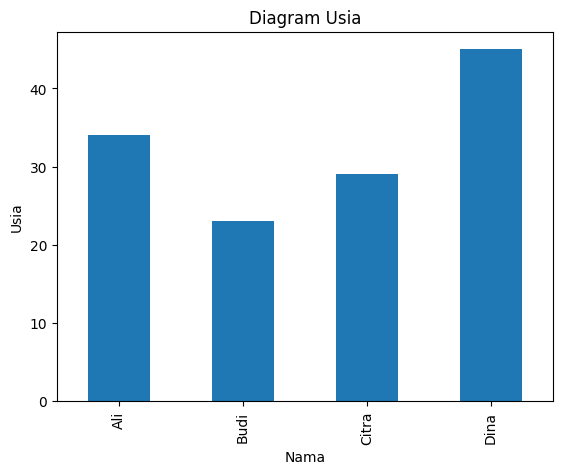

In [20]:
import pandas as pd  
import matplotlib.pyplot as plt

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Usia": [34, 23, 29, 45]}
df_pandas = pd.DataFrame(data_pandas)

# Membuat DataFrame kedua
data_pandas_2 = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Pekerjaan": ["Dokter", "Guru", "Insinyur", "Perawat"]}
df_pandas_2 = pd.DataFrame(data_pandas_2)

# Join antara dua DataFrame
df_joined = pd.merge(df_pandas, df_pandas_2, on="Nama")
print("DataFrame Gabungan:")
print(df_joined)

# Menghitung statistik deskriptif
print("\nStatistik Deskriptif:")
print(df_pandas.describe())

# Plotting Data
df_pandas.plot(kind='bar', x='Nama', y='Usia', legend=False)
plt.title('Diagram Usia')
plt.xlabel('Nama')
plt.ylabel('Usia')
plt.show()


- **Tugas 4**: Lakukan penggabungan DataFrame dan visualisasikan data dengan Pandas.

### 5. Menggabungkan PySpark dan Pandas
- **Latihan 4: Mengonversi DataFrame antara PySpark dan Pandas**
  Praktik untuk convert DataFrame dari PySpark ke Pandas dan sebaliknya:


In [32]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame PySpark
data_spark = [("Ali", 34), ("Budi", 23), ("Citra", 29), ("Dina", 45), ("Aurelia", 21), ("Wahyu", 22)]
columns_spark = ["Nama", "Usia"]
df_spark = spark.createDataFrame(data_spark, columns_spark)

# Menampilkan DataFrame PySpark
print("\nDataFrame Gabungan:")
df_spark.show()

# Menghitung rata-rata usia dari DataFrame PySpark
df_spark.groupBy().agg(avg("Usia").alias("Rata-rata Usia")).show()



DataFrame Gabungan:
+-------+----+
|   Nama|Usia|
+-------+----+
|    Ali|  34|
|   Budi|  23|
|  Citra|  29|
|   Dina|  45|
|Aurelia|  21|
|  Wahyu|  22|
+-------+----+

+--------------+
|Rata-rata Usia|
+--------------+
|          29.0|
+--------------+



- **Tugas 5**: Gunakan metode ini untuk menggabungkan data yang Anda buat di PySpark dengan data dari Pandas, kemudian lakukan analisis sederhana seperti menghitung rata-rata usia.

### 6. Konversi Data antara PySpark dan Pandas

In [28]:
from pyspark.sql import SparkSession
import pandas as pd
from pyspark.sql.functions import max

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame PySpark
data_spark = [("Ali", 34), ("Budi", 23), ("Citra", 29), ("Dina", 45), ("Aurelia", 21), ("Wahyu", 22)]
columns_spark = ["Nama", "Usia"]
df_spark = spark.createDataFrame(data_spark, columns_spark)

# Mengonversi DataFrame PySpark ke Pandas
df_pandas_from_spark = df_spark.toPandas()

# Menampilkan DataFrame gabungan
print("\nDataFrame Gabungan:")
df_spark.show()

# Menghitung nilai maksimum usia langsung di PySpark
df_spark.agg(max("Usia").alias("Usia Maksimum")).show()



DataFrame Gabungan:
+-------+----+
|   Nama|Usia|
+-------+----+
|    Ali|  34|
|   Budi|  23|
|  Citra|  29|
|   Dina|  45|
|Aurelia|  21|
|  Wahyu|  22|
+-------+----+

+-------------+
|Usia Maksimum|
+-------------+
|           45|
+-------------+



- **Tugas 6**: Gabungkan data dari PySpark dan Pandas, lalu lakukan operasi statistik seperti menghitung nilai maksimum usia.